# Movie Data Analysis

- Student name: Gamze Turan
- Student pace: self paced 
- Scheduled project review date/time: 4/27/2022
- Instructor name: Claude Fried 
- Blog post URL:https://ginaturan.blogspot.com/

![alt text](images/action.jpg)

## Overview

>This project analysis is determining profitability of a film studio is crucially dependent on picking the right film projects. In order the find the best film project we will find the most popular genres according to our datasets and their profits. Also, another aspect of film projects is their rating. Depending on the case, rating can lower the sales of the movie or totally cross out the movie from existence (Scoot Bowles).

## Business Problem

![alt text](images/microsoft_studio.jpg)

> Microsoft sees all the big companies creating original video content and they want to get in on the fun.Microsoft's new movie studio can use to help decide what type of films to create.

## Data Understanding

<img align="left" width="600" height="600" src='images/hollywood.jpg'>

The movie business has large scale of data since they have been over a century. From a selected data files, we will combine them  to determine genres, ratings and profitability.

In [86]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [87]:
df_bom_gross = pd.read_csv('data/bom.movie_gross.csv.gz')
df_imdb_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
df_imdb_rating = pd.read_csv('data/imdb.title.ratings.csv.gz')

In [88]:
df_bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [89]:
df_bom_gross.sample(5)

,title,studio,domestic_gross,foreign_gross,year
1809,Child's Pose,Zeit.,97200.0,NaN,2014
854,Premium Rush,Sony,20300000.0,10800000,2012
196,Vision,Zeit.,435000.0,4600000,2010
1692,Rosewater,ORF,3100000.0,NaN,2014
1717,Tusk,A24,1800000.0,NaN,2014


In [90]:
df_imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
df_imdb_basics.sample(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
112848,tt6624312,Rodney King,Rodney King,2017,52.0,Drama
138698,tt8933716,Wedding 93,Wedding 93,2018,71.0,Horror
97951,tt5720312,Fade to Black,Fade to Black,2016,NaN,Documentary
85587,tt4953610,Home Video,The Purging Hour,2016,80.0,"Drama,Horror,Mystery"
36851,tt2339954,Les six saisons,Les six saisons,2012,51.0,"Adventure,Documentary"


In [7]:
df_imdb_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
df_imdb_rating.sample(5)

,tconst,averagerating,numvotes
49908,tt2573870,6.1,8
1067,tt1801098,5.4,175
29884,tt7041662,7.5,13
67317,tt6879318,5.5,257
12736,tt2446318,5.5,252


# Bom Movie Data

In [9]:
# to check if there are any duplication
df_bom_gross.duplicated().value_counts()

False    3387
dtype: int64

In [10]:
# NaN values in the datasets
df_bom_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

# Imdb Data

In [11]:
df_imdb_basics.duplicated().value_counts()

False    146144
dtype: int64

In [12]:
df_imdb_basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [13]:
df_imdb_rating.duplicated().value_counts()

False    73856
dtype: int64

In [14]:
df_imdb_rating.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

# Merge Data

In [15]:
# merge basics in rating based on tconst
df_merge = pd.merge(df_imdb_basics,df_imdb_rating, on="tconst")
df_merge

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [16]:
# drop the dublicated info column
df_merge = df_merge.drop(['tconst', 'runtime_minutes'], axis=1)
df_merge                 

,primary_title,original_title,start_year,genres,averagerating,numvotes
0,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43
2,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...
73851,Diabolik sono io,Diabolik sono io,2019,Documentary,6.2,6
73852,Sokagin Çocuklari,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73853,Albatross,Albatross,2017,Documentary,8.5,8
73854,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,6.6,5


In [17]:
# creating a new column called title and its contain the same values from the original title
df_merge['title'] = df_merge['original_title']

In [18]:
# 2nd merge bom_gross and df_merge based on title
df_merge = pd.merge(df_bom_gross, df_merge, on="title", how='inner')
df_merge

,title,studio,domestic_gross,foreign_gross,year,primary_title,original_title,start_year,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,Inception,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After,Shrek Forever After,2010,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,Iron Man 2,Iron Man 2,2010,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...
2442,Loving Pablo,Uni.,22000.0,NaN,2018,Loving Pablo,Loving Pablo,2017,"Action,Biography,Crime",6.3,13988
2443,The Escape,IFC,14000.0,NaN,2018,The Escape,The Escape,2017,Drama,5.9,1290
2444,Souvenir,Strand,11400.0,NaN,2018,Souvenir,Souvenir,2016,"Drama,Music,Romance",6.0,823
2445,Souvenir,Strand,11400.0,NaN,2018,Souvenir,Souvenir,2014,"Comedy,Romance",5.9,9


In [19]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447 entries, 0 to 2446
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2447 non-null   object 
 1   studio          2444 non-null   object 
 2   domestic_gross  2429 non-null   float64
 3   foreign_gross   1573 non-null   object 
 4   year            2447 non-null   int64  
 5   primary_title   2447 non-null   object 
 6   original_title  2447 non-null   object 
 7   start_year      2447 non-null   int64  
 8   genres          2443 non-null   object 
 9   averagerating   2447 non-null   float64
 10  numvotes        2447 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 229.4+ KB


# Data Cleaning

In [20]:
# drop  column
df_merge = df_merge.drop(['studio', 'original_title', 'primary_title', 'year'], axis=1)
df_merge.sample(5)

,title,domestic_gross,foreign_gross,start_year,genres,averagerating,numvotes
1236,The Remaining,1200000.0,NaN,2014,"Drama,Horror,Mystery",4.3,6274
1556,Bombay Velvet,451000.0,NaN,2015,"Action,Crime,Drama",5.7,5029
1196,The Immigrant,2000000.0,3800000,2013,"Drama,Romance",6.6,26618
1988,Coco,209700000.0,597400000,2017,Horror,7.4,35
1608,The Duke of Burgundy,64500.0,NaN,2014,"Drama,Mystery,Romance",6.6,10301


In [21]:
# replace the NaN values with median in row
df_merge['domestic_gross'].fillna(value=df_merge['domestic_gross'].median(), inplace=True)

In [22]:
## replace the NaN values with 0 in row
df_merge['foreign_gross'].fillna(value=0, inplace=True)

In [23]:
# creating a function to replace str to float and remove ","
def parsecomma(x):
    if type(x)== str:
        return float(x.replace(',',''))
    else:
        return 0

In [24]:
# used Transform function to transform values by passing each into parsecomma
df_merge['foreign_gross'] = df_merge['foreign_gross'].transform(parsecomma)

In [25]:
# turning NaN values into empty strings
df_merge.dropna(inplace=True, axis=0)

In [26]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2443 entries, 0 to 2446
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2443 non-null   object 
 1   domestic_gross  2443 non-null   float64
 2   foreign_gross   2443 non-null   float64
 3   start_year      2443 non-null   int64  
 4   genres          2443 non-null   object 
 5   averagerating   2443 non-null   float64
 6   numvotes        2443 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 152.7+ KB


In [27]:
df_merge.describe()

,domestic_gross,foreign_gross,start_year,averagerating,numvotes
count,2.443000e+03,2.443000e+03,2443.000000,2443.000000,2.443000e+03
mean,3.587207e+07,5.242519e+07,2013.774458,6.405690,7.284939e+04
std,6.935400e+07,1.185574e+08,2.493786,1.045491,1.346654e+05
min,1.000000e+02,0.000000e+00,2010.000000,1.600000,5.000000e+00
25%,3.040000e+05,0.000000e+00,2012.000000,5.800000,3.791000e+03
50%,5.100000e+06,4.200000e+06,2014.000000,6.500000,2.083100e+04
75%,4.260000e+07,4.470000e+07,2016.000000,7.100000,8.086100e+04
max,7.001000e+08,9.464000e+08,2019.000000,9.200000,1.841066e+06


In [28]:
# sample of final data
df_merge.sample(5)

,title,domestic_gross,foreign_gross,start_year,genres,averagerating,numvotes
616,The Master,16399999.0,11900000.0,2014,"Action,History",4.8,54
444,The Future,569000.0,0.0,2011,"Drama,Fantasy,Romance",6.2,7648
1978,The Fate of the Furious,226000000.0,1010.0,2017,"Action,Crime,Thriller",6.7,179774
73,Vampires Suck,36700000.0,43900000.0,2010,Comedy,3.4,43984
1565,Good Kill,316000.0,0.0,2014,"Drama,Thriller,War",6.4,21095


# Feature Engineering
> I create a total_gross feature to combine domestic and foreign gross to indicate total profit.

In [29]:
df_merge['total_gross'] = df_merge['domestic_gross'] + df_merge['foreign_gross']
df_merge['total_gross']

0       1.067000e+09
1       8.283000e+08
2       7.526000e+08
3       6.985000e+08
4       6.239000e+08
            ...     
2442    2.200000e+04
2443    1.400000e+04
2444    1.140000e+04
2445    1.140000e+04
2446    1.700000e+03
Name: total_gross, Length: 2443, dtype: float64

In [92]:
df_merge.iloc[0]

title                            Toy Story 3
domestic_gross                      4.15e+08
foreign_gross                       6.52e+08
start_year                              2010
genres            Adventure,Animation,Comedy
averagerating                            8.3
numvotes                              682218
total_gross                        1.067e+09
Name: 0, dtype: object

> Look at the above cell to see multiple genres appear together in one string. The following cell deals with this.

In [62]:
# I created genre dictionaries with popularity, count, votes and total_gross.
# For visualization to compare genres many different ways
genre_count = dict()
genre_pop = dict()
genre_votes = dict()
genre_total_gross = dict()
for i, row in df_merge.iterrows():
    for genre in row['genres'].split(','):
        if not genre in genre_count:
            genre_count[genre] = 0
            genre_pop[genre] = 0
            genre_votes[genre] = 0
            genre_total_gross[genre] = 0
        genre_count[genre] += 1 
        genre_pop[genre] += row["averagerating"]
        genre_votes[genre] += row["numvotes"] 
        genre_total_gross[genre] += row["total_gross"]

In [63]:
# converting totals into average totals
for genre in genre_count:
    genre_pop[genre] /= genre_count[genre]
    genre_votes[genre] /= genre_count[genre]
    genre_total_gross[genre] /= genre_count[genre]

In [64]:
# checking the number of movies present in each genre.(Note:Movies can be counted in multiple genres)
genre_count

{'Adventure': 381,
 'Animation': 113,
 'Comedy': 791,
 'Action': 527,
 'Sci-Fi': 128,
 'Drama': 1354,
 'Fantasy': 135,
 'Family': 105,
 'Biography': 256,
 'History': 99,
 'Thriller': 380,
 'Romance': 377,
 'Horror': 223,
 'Mystery': 177,
 'Western': 18,
 'Crime': 330,
 'Documentary': 206,
 'Sport': 54,
 'War': 30,
 'Music': 84,
 'Musical': 15,
 'News': 4}

In [65]:
# avg. number of votes given to movies in each genre
genre_votes

{'Adventure': 173712.3280839895,
 'Animation': 108579.03539823009,
 'Comedy': 67463.79646017699,
 'Action': 141165.4516129032,
 'Sci-Fi': 247400.8125,
 'Drama': 58108.99704579025,
 'Fantasy': 125685.28148148148,
 'Family': 53437.0,
 'Biography': 65386.5390625,
 'History': 53237.48484848485,
 'Thriller': 87677.95789473684,
 'Romance': 46786.94694960212,
 'Horror': 58348.51569506727,
 'Mystery': 96940.51412429378,
 'Western': 117065.55555555556,
 'Crime': 82573.64545454546,
 'Documentary': 5782.766990291262,
 'Sport': 51640.38888888889,
 'War': 27843.633333333335,
 'Music': 45609.32142857143,
 'Musical': 32385.4,
 'News': 306.75}

In [66]:
# avg. rating given to movies by genre
genre_pop

{'Adventure': 6.457217847769015,
 'Animation': 6.563716814159294,
 'Comedy': 6.223767383059421,
 'Action': 6.20531309297912,
 'Sci-Fi': 6.431250000000004,
 'Drama': 6.528508124076822,
 'Fantasy': 6.184444444444445,
 'Family': 6.167619047619049,
 'Biography': 6.98203125,
 'History': 6.866666666666666,
 'Thriller': 6.083157894736842,
 'Romance': 6.303713527851454,
 'Horror': 5.633632286995516,
 'Mystery': 6.194350282485879,
 'Western': 6.511111111111112,
 'Crime': 6.400909090909091,
 'Documentary': 7.268446601941747,
 'Sport': 6.898148148148145,
 'War': 6.583333333333333,
 'Music': 6.722619047619046,
 'Musical': 6.1866666666666665,
 'News': 7.1000000000000005}

In [67]:
# allows sorted to sort on a index 1
import operator

In [68]:
sorted_genre = sorted(genre_count.items(), key=operator.itemgetter(1))[10:]
sorted_genre

[('Fantasy', 135),
 ('Mystery', 177),
 ('Documentary', 206),
 ('Horror', 223),
 ('Biography', 256),
 ('Crime', 330),
 ('Romance', 377),
 ('Thriller', 380),
 ('Adventure', 381),
 ('Action', 527),
 ('Comedy', 791),
 ('Drama', 1354)]

 # Analysis

In [69]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Popularity of Genres

> In below graph comparing Genres using the avarage rating to show which genres are the most popular

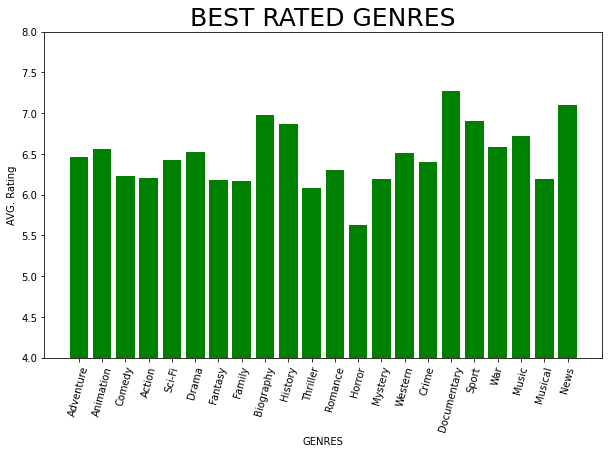

In [94]:
fig, ax = plt.subplots(figsize=(10, 6))

# Use plot() function to create a plot using above values
ax.bar(range(len(genre_pop)), genre_pop.values(), color="green")
ax.set_xticklabels(genre_pop, rotation=75)
ax.set_xticks(range(len(genre_pop)))
# Add labels for x and y axes
ax.set_xlabel('GENRES')
ax.set_ylabel('AVG. Rating')

# Add a title for the plot
ax.set_title('BEST RATED GENRES', fontdict={"fontsize":25})
# setting scale of the y axis
ax.set_ylim((4,8))
fig.savefig("BEST RATED GENRES.png")

### Profitability in Genres

> Below graph is showing which genres are the most profitable.

''

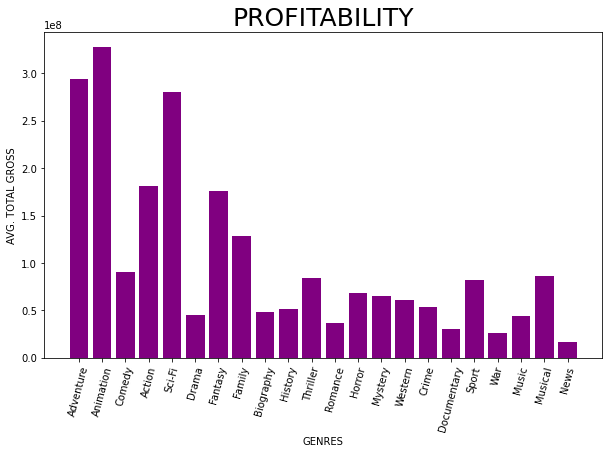

In [93]:
fig, ax = plt.subplots(figsize=(10, 6))

# Use plot() function to create a plot using above values
ax.bar(range(len(genre_total_gross)), genre_total_gross.values(), color="purple")
ax.set_xticklabels(genre_total_gross, rotation=75)
ax.set_xticks(range(len(genre_total_gross)))
# Add labels for x and y axes
ax.set_xlabel('GENRES')
ax.set_ylabel('AVG. TOTAL GROSS')

# Add a title for the plot
ax.set_title('PROFITABILITY', fontdict={"fontsize":25})
fig.savefig("PROFITABILITY.png")
;

### Profitability by Year

> Scatter plots is allowing us to see the profitability of every movie across to years. In conclusion more  movies are made in the less profitable region.

In [80]:
# Highest grossing movie 
df_merge[ df_merge["total_gross"] == df_merge["total_gross"].max()]

,title,domestic_gross,foreign_gross,start_year,genres,averagerating,numvotes,total_gross
1324,Avengers: Age of Ultron,459000000.0,946400000.0,2015,"Action,Adventure,Sci-Fi",7.3,665594,1.405400e+09


''

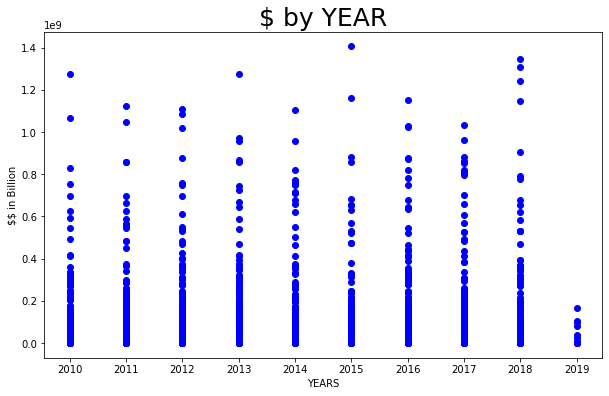

In [95]:
fig, ax = plt.subplots(figsize=(10, 6))

# Use plot() function to create a plot using above values
ax.scatter(df_merge["start_year"], df_merge["total_gross"], color="blue")

ax.set_xticks(range(2010, 2020))
# Add labels for x and y axes
ax.set_xlabel('YEARS')
ax.set_ylabel('\$$ in Billion')

# Add a title for the plot
ax.set_title('\$ by YEAR', fontdict={"fontsize":25})
fig.savefig("YEAR.png")
;

# Conclusion 